In [1]:
#dependencies & setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#sunroof_city = "project-sunroof-city-09082017.csv"
sunroofCity = "Resources/google-project-sunroof/project-sunroof-city-09082017.csv"
sunroofState = "Resources/google-project-sunroof/project-sunroof-state-09082017.csv"
surfaceArea = "Resources/State-Surface-Area.csv"

In [2]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Dataframe Creation
sunroofState_DF = pd.read_csv(sunroofState)
surfaceArea_DF = pd.read_csv(surfaceArea)
#Data Orginiztion
#Compare CO2 offset by State
#State_name, carbon_offset_metric_tons
sunroofStateOrginized_DF = sunroofState_DF.reindex(columns = ["state_name", "carbon_offset_metric_tons"])
sunroofStateOrginizedClean_DF = sunroofStateOrginized_DF.dropna()
sunroofStateWorking_DF = sunroofStateOrginizedClean_DF
sunroofStateWorking_DF = sunroofStateWorking_DF.rename(columns = {"state_name": "State", "carbon_offset_metric_tons": "Carbon Offset"})
sunroofStateFinal_DF = sunroofStateWorking_DF.join(surfaceArea_DF)
sunroofStateFinal_DF = sunroofStateFinal_DF.reindex(columns = ["State", "Carbon Offset", "Surface Area"])
#sunroofStateFinal_DF = sunroofStateFinal_DF.style.format({"Carbon Offset": "{:2f}"})


#sunroofStateWorking_DF.head()
sunroofStateFinal_DF.head()
#surfaceArea_DF.dtypes

,State,Carbon Offset,Surface Area
1,Alabama,1.202295e+07,50645.0
2,Alaska,1.921975e+05,570641.0
3,Arizona,1.991384e+07,113594.0
4,Arkansas,5.619081e+06,52035.0
5,California,5.449561e+07,155779.0


In [3]:
#Total Carbon offset for all States
totalCarbonOffset = sunroofStateWorking_DF["Carbon Offset"].sum()
print(totalCarbonOffset)
X = sunroofStateFinal_DF["Carbon Offset"].sum()
print(X)


571649986.3666
571649986.3666


Text(0,0.5,'Carbon Offset in Metric Tons\n(In 10 Millions)')

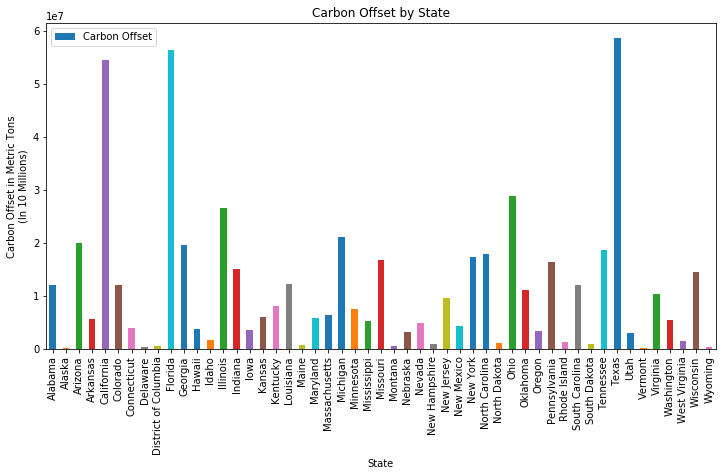

In [21]:
#Charts
#Bar Chart of Carbon Offset by State
sunroofStateFinal_DF.plot.bar(x = "State", y = "Carbon Offset", figsize = (12,6))
plt.title("Carbon Offset by State")
plt.xlabel("State")
plt.ylabel("Carbon Offset in Metric Tons" 
           "\n"
           "(In 10 Millions)")


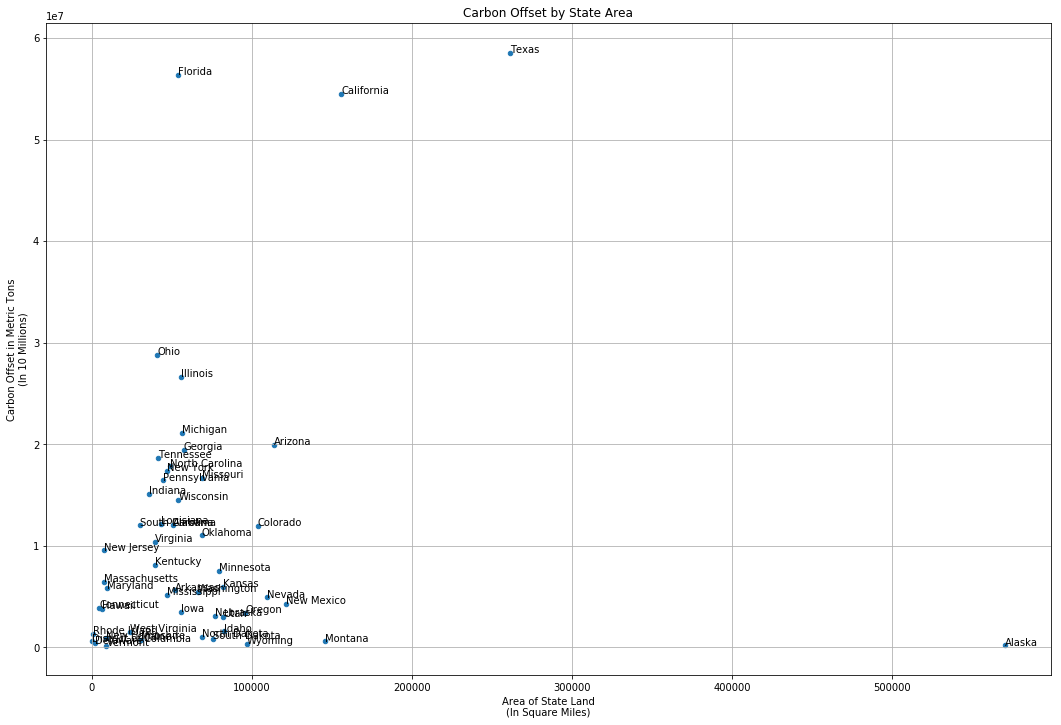

In [55]:
#Scatter plot
#Carbon Offset by Surface Area
sunroofStateFinal_DF.plot.scatter(x="Surface Area", y = "Carbon Offset", figsize = (18,12))
plt.title("Carbon Offset by State Area")
plt.xlabel("Area of State Land" 
           "\n"
           "(In Square Miles)")
plt.ylabel("Carbon Offset in Metric Tons" 
           "\n"
           "(In 10 Millions)")
plt.grid(True)

#Annotation variables
test1 = np.array(sunroofStateFinal_DF["Surface Area"])
test2 = np.array(sunroofStateFinal_DF["Carbon Offset"])
variableLabel = np.array(sunroofStateFinal_DF.State)

for i, txt in enumerate(variableLabel):
    plt.annotate(txt, (test1[i], test2[i]))

(-2737667.5659156567, 30000000)

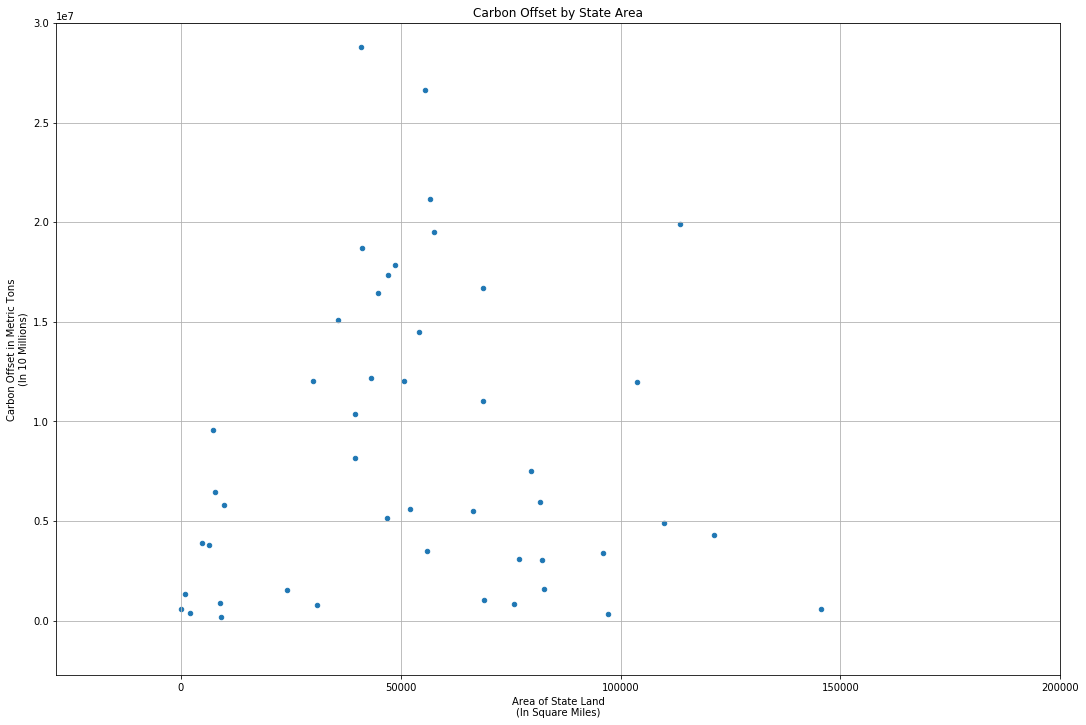

In [56]:
#Scatter plot
#Carbon Offset by Surface Area
sunroofStateFinal_DF.plot.scatter(x="Surface Area", y = "Carbon Offset", figsize = (18,12))
plt.title("Carbon Offset by State Area")
plt.xlabel("Area of State Land" 
           "\n"
           "(In Square Miles)")
plt.ylabel("Carbon Offset in Metric Tons" 
           "\n"
           "(In 10 Millions)")
plt.grid(True)
plt.xlim(xmax = 200000)
plt.ylim(ymax = 30000000)

In [52]:
#DataFrame For Missouri
sunroofCityBase_DF = pd.read_csv(sunroofCity)
sunroofCityBaseTrim_DF = sunroofCityBase_DF.reindex(columns =["region_name", "state_name", "carbon_offset_metric_tons"])
sunroofCityMo = sunroofCityBaseTrim_DF.loc[sunroofCityBaseTrim_DF["state_name"]=="Missouri"]
#sunroofCityBase_DF.head()
#sunroofCityBaseTrim_DF.head()
sunroofCityMo.head()
#sunroofCityMo.count()


,region_name,state_name,carbon_offset_metric_tons
22,Affton,Missouri,68947.764116
32,Airport Drive,Missouri,9928.741651
108,Amazonia,Missouri,108.538894
198,Arnold,Missouri,162130.008802
281,Avondale,Missouri,871.825232
